<a href="https://colab.research.google.com/github/M-luthra07/deep-learning-ann-unit-1/blob/main/practical_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [4]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')  # Placeholder
X = churn_data.drop(['Survived'], axis=1)  # Replace 'Survived' with your target column 'Exited'
y = churn_data['Survived']

In [5]:
# Preprocessing
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define a function to create the ANN model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_scaled.shape[1]),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize K-Fold Cross Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
conf_matrices = []

In [6]:
# K-Fold Cross-Validation Loop
for fold, (train_idx, val_idx) in enumerate(kfold.split(X_scaled, y), start=1):
    print(f"Training Fold {fold}...")

    # Split the data
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Create a new model for each fold
    model = create_model()

    # Define Model Checkpoint
    checkpoint = ModelCheckpoint(
        filepath=f'model_fold_{fold}.keras',  # Save in .keras format
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )

Training Fold 1...
Training Fold 2...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Fold 3...
Training Fold 4...
Training Fold 5...


In [8]:
# K-Fold Cross-Validation Loop
for fold, (train_idx, val_idx) in enumerate(kfold.split(X_scaled, y), start=1):
    print(f"Training Fold {fold}...")

    # Split the data
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Create a new model for each fold
    model = create_model()

    # Define Model Checkpoint
    checkpoint = ModelCheckpoint(
        filepath=f'model_fold_{fold}.keras',  # Save in .keras format
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=50, batch_size=32, callbacks=[checkpoint], verbose=1)

    # Evaluate the model on validation data  #This block was incorrectly indented
    val_predictions = (model.predict(X_val) > 0.5).astype(int)
    accuracy = accuracy_score(y_val, val_predictions)
    precision = precision_score(y_val, val_predictions)
    recall = recall_score(y_val, val_predictions)
    f1 = f1_score(y_val, val_predictions)
    conf_matrix = confusion_matrix(y_val, val_predictions)

    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

    print(f"Fold {fold} Validation Accuracy: {accuracy:.4f}")
    print(f"Fold {fold} Validation Precision: {precision:.4f}")
    print(f"Fold {fold} Validation Recall: {recall:.4f}")
    print(f"Fold {fold} Validation F1-Score: {f1:.4f}")
    print(f"Fold {fold} Confusion Matrix:\n{conf_matrix}")

Training Fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5956 - loss: nan
Epoch 1: val_accuracy improved from -inf to 0.61453, saving model to model_fold_1.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5974 - loss: nan - val_accuracy: 0.6145 - val_loss: nan
Epoch 2/50
12/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5657 - loss: nan   
Epoch 2: val_accuracy did not improve from 0.61453
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5912 - loss: nan - val_accuracy: 0.6145 - val_loss: nan
Epoch 3/50
14/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5723 - loss: nan 
Epoch 3: val_accuracy did not improve from 0.61453
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5896 - loss: nan - val_accuracy: 0.6145 - val_loss: nan
Epoch 4/50
14/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5814 - loss: nan  
Epoch 4: val_accuracy did not improve from 0.61453
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5964 - loss: nan - val_accuracy: 0.6145 - val_lo

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5884 - loss: nan
Epoch 1: val_accuracy improved from -inf to 0.61798, saving model to model_fold_2.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5971 - loss: nan - val_accuracy: 0.6180 - val_loss: nan
Epoch 2/50
14/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6202 - loss: nan  
Epoch 2: val_accuracy did not improve from 0.61798
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6188 - loss: nan - val_accuracy: 0.6180 - val_loss: nan
Epoch 3/50
13/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6147 - loss: nan 
Epoch 3: val_accuracy did not improve from 0.61798
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6177 - loss: nan - val_accuracy: 0.6180 - val_loss: nan
Epoch 4/50
13/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6078 - loss: nan 
Epoch 4: val_accuracy did not improve from 0.61798
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6105 - loss: nan - val_accuracy: 0.6180 - val_loss: nan
Epoch

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6138 - loss: nan
Epoch 1: val_accuracy improved from -inf to 0.61798, saving model to model_fold_3.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6160 - loss: nan - val_accuracy: 0.6180 - val_loss: nan
Epoch 2/50
13/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5726 - loss: nan  
Epoch 2: val_accuracy did not improve from 0.61798
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5859 - loss: nan - val_accuracy: 0.6180 - val_loss: nan
Epoch 3/50
14/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6181 - loss: nan  
Epoch 3: val_accuracy did not improve from 0.61798
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6172 - loss: nan - val_accuracy: 0.6180 - val_loss: nan
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6198 - loss: nan
Epoch 4: val_accuracy did not improve from 0.61798
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6197 - loss: nan - val_accuracy: 0.6180 - val_loss: nan
Epoch

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold 3 Validation Accuracy: 0.6180
Fold 3 Validation Precision: 0.0000
Fold 3 Validation Recall: 0.0000
Fold 3 Validation F1-Score: 0.0000
Fold 3 Confusion Matrix:
[[110   0]
 [ 68   0]]
Training Fold 4...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6066 - loss: nan
Epoch 1: val_accuracy improved from -inf to 0.61798, saving model to model_fold_4.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6118 - loss: nan - val_accuracy: 0.6180 - val_loss: nan
Epoch 2/50
12/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6662 - loss: nan 
Epoch 2: val_accuracy did not improve from 0.61798
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6383 - loss: nan - val_accuracy: 0.6180 - val_loss: nan
Epoch 3/50
13/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6214 - loss: nan  
Epoch 3: val_accuracy did not improve from 0.61798
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6225 - loss: nan - val_accuracy: 0.6180 - val_loss: nan
Epoch 4/50
13/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5821 - loss: nan 
Epoch 4: val_accuracy did not improve from 0.61798
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5975 - loss: nan - val_accuracy: 0.6180 - val_loss: nan
Epoch

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold 4 Validation Accuracy: 0.6180
Fold 4 Validation Precision: 0.0000
Fold 4 Validation Recall: 0.0000
Fold 4 Validation F1-Score: 0.0000
Fold 4 Confusion Matrix:
[[110   0]
 [ 68   0]]
Training Fold 5...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6096 - loss: nan
Epoch 1: val_accuracy improved from -inf to 0.61236, saving model to model_fold_5.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6170 - loss: nan - val_accuracy: 0.6124 - val_loss: nan
Epoch 2/50
17/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6106 - loss: nan
Epoch 2: val_accuracy did not improve from 0.61236
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6123 - loss: nan - val_accuracy: 0.6124 - val_loss: nan
Epoch 3/50
18/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6268 - loss: nan
Epoch 3: val_accuracy did not improve from 0.61236
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6247 - loss: nan - val_accuracy: 0.6124 - val_loss: nan
Epoch 4/50
19/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6050 - loss: nan
Epoch 4: val_accuracy did not improve from 0.61236
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6081 - loss: nan - val_accuracy: 0.6124 - val_loss: nan
Epoch 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


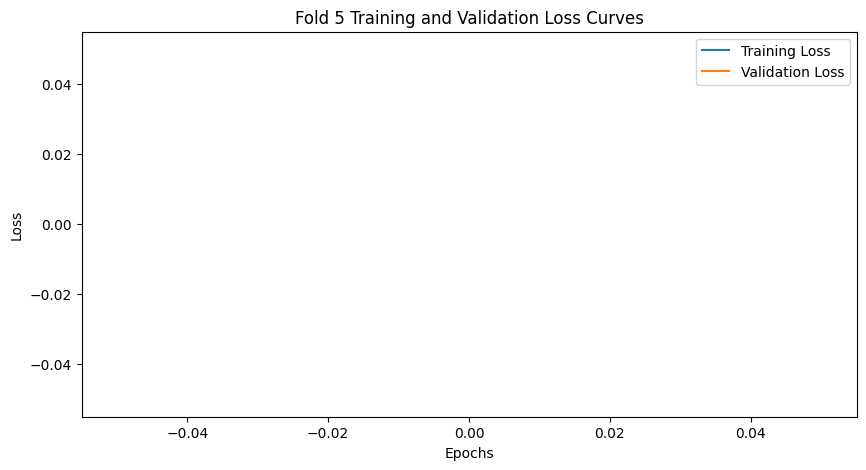

In [9]:
    # Plot training and validation loss curves
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Training and Validation Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [10]:

# Print overall results
print(f"\nAverage Accuracy Across Folds: {np.mean(fold_accuracies):.4f}")
print(f"Average Precision Across Folds: {np.mean(fold_precisions):.4f}")
print(f"Average Recall Across Folds: {np.mean(fold_recalls):.4f}")
print(f"Average F1-Score Across Folds: {np.mean(fold_f1_scores):.4f}")
print(f"Standard Deviation of Accuracies: {np.std(fold_accuracies):.4f}")

# Print confusion matrices for each fold
for fold, conf_matrix in enumerate(conf_matrices, start=1):
    print(f"\nConfusion Matrix for Fold {fold}:\n{conf_matrix}")


Average Accuracy Across Folds: 0.6162
Average Precision Across Folds: 0.0000
Average Recall Across Folds: 0.0000
Average F1-Score Across Folds: 0.0000
Standard Deviation of Accuracies: 0.0023

Confusion Matrix for Fold 1:
[[110   0]
 [ 69   0]]

Confusion Matrix for Fold 2:
[[110   0]
 [ 68   0]]

Confusion Matrix for Fold 3:
[[110   0]
 [ 68   0]]

Confusion Matrix for Fold 4:
[[110   0]
 [ 68   0]]

Confusion Matrix for Fold 5:
[[109   0]
 [ 69   0]]


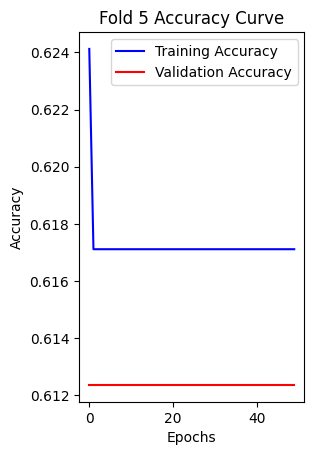

In [13]:
 # Accuracy curve
plt.subplot(1, 2, 2) # Fixed indentation
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title(f'Fold {fold} Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

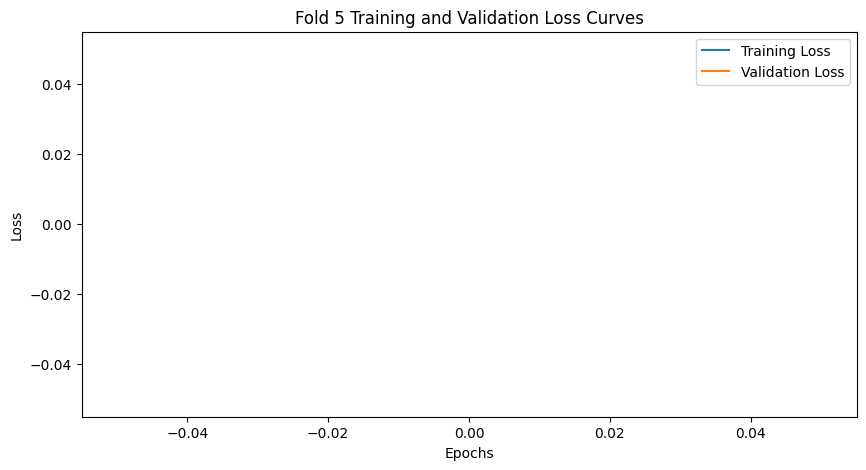

In [14]:
# prompt: genrate tring n teting lloss curves

import matplotlib.pyplot as plt
# Plot training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Fold {fold} Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





Confusion Matrix for Fold 1:
[[110   0]
 [ 69   0]]


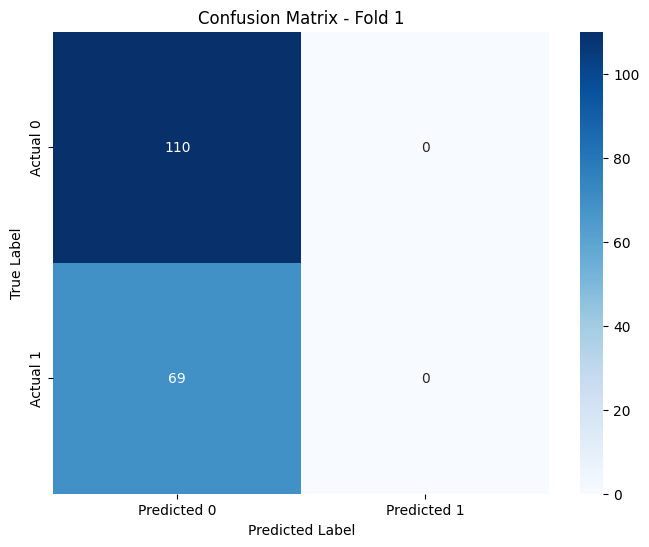


Confusion Matrix for Fold 2:
[[110   0]
 [ 68   0]]


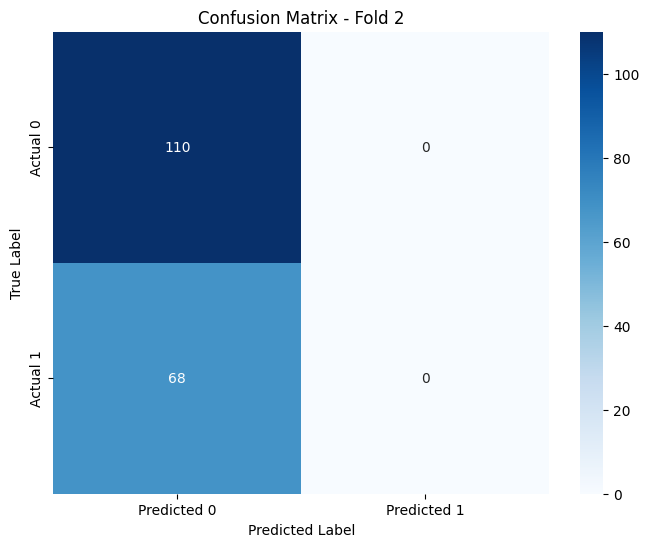


Confusion Matrix for Fold 3:
[[110   0]
 [ 68   0]]


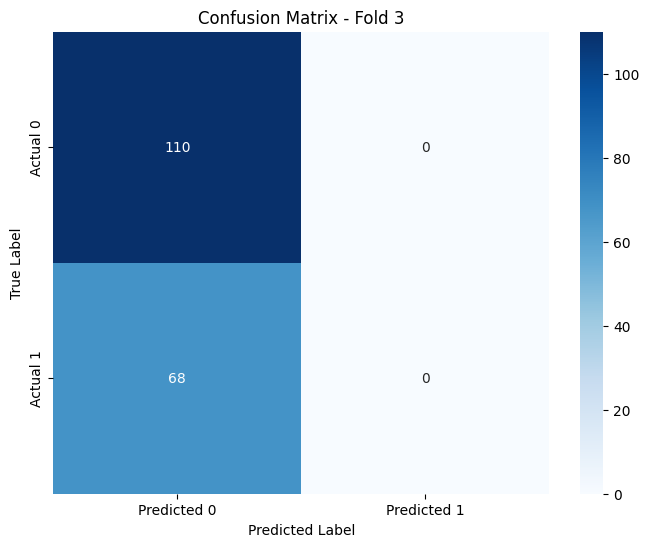


Confusion Matrix for Fold 4:
[[110   0]
 [ 68   0]]


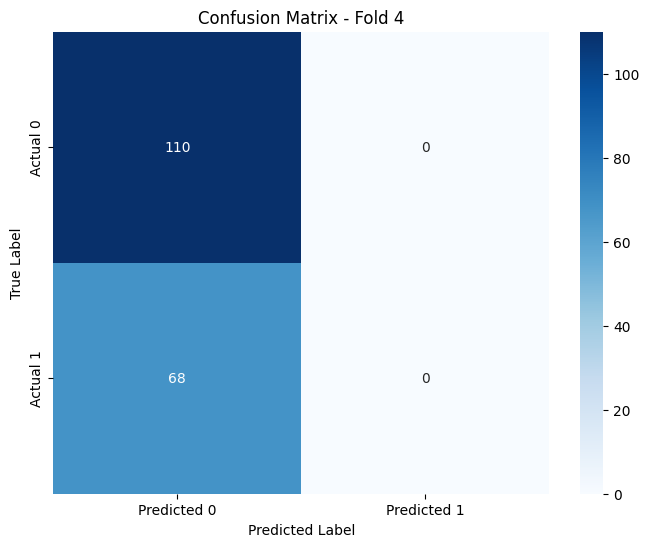


Confusion Matrix for Fold 5:
[[109   0]
 [ 69   0]]


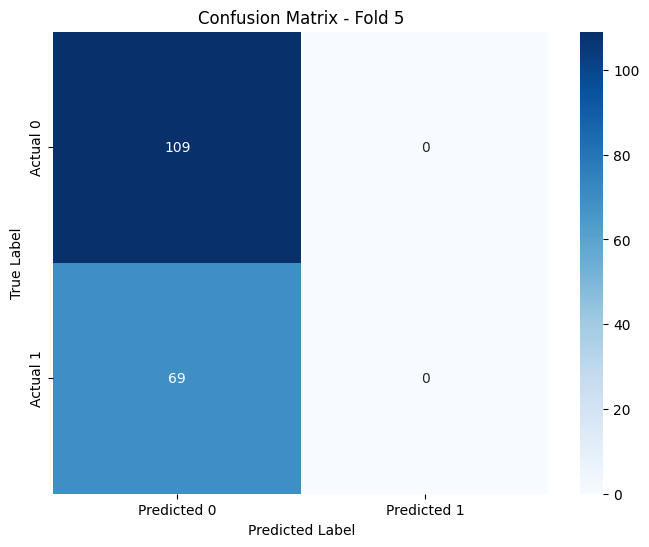

In [15]:
# prompt: generate confusssion matrix

import matplotlib.pyplot as plt
# Assuming you have already trained the model and have the 'conf_matrices' list
# Print confusion matrices for each fold
for fold, conf_matrix in enumerate(conf_matrices, start=1):
    print(f"\nConfusion Matrix for Fold {fold}:\n{conf_matrix}")

    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
